In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Membaca dffruit dari file Excel

In [2]:
dffruit = pd.read_excel('fruit.xlsx')
dffruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


untuk mengetahui info dari tabel (berapa kolom,berapa banyak data tiap kolom ,type data)

In [3]:
dffruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


untuk mengetahui min,max,mean

In [4]:
dffruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


mengetahui jumlah label dan  apa aja labelnya + type data

In [5]:
pd.unique(dffruit['name'])

array(['orange', 'grapefruit'], dtype=object)

mengetahui jumlah data yang dari setiap label

In [6]:
dffruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

Memeriksa missing values

In [7]:
if dffruit.isnull().sum().sum() > 0:
    print("Terdapat missing values, silakan bersihkan dffruit terlebih dahulu.")
else:
    print("Tidak ada missing values.")

Tidak ada missing values.


Memisahkan antara independen dan dependen

In [8]:
x = dffruit.drop(columns=['name'])
y = dffruit['name']


In [9]:
x

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [10]:
y

0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: name, Length: 10000, dtype: object

Encoding label jika diperlukan & Ubah dengan nama kolom target

In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

Visualisasi dffruit

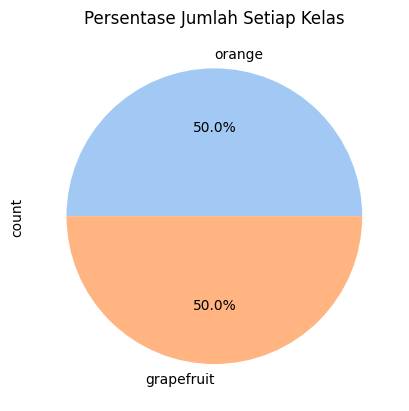

In [12]:
sns.set_palette('pastel')
dffruit['name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Persentase Jumlah Setiap Kelas")
plt.show()

Bagi dataset menjadi set pelatihan, validasi, dan pengujian

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Skalakan fitur menggunakan StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_val = scaler.transform(X_val)          # Only transform on validation data
X_test = scaler.transform(X_test)        # Only transform on test data

Hyperparameter Tuning (GridSearchCV)

In [15]:
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'], 
    'alpha': [0.0001, 0.001, 0.01, 0.1],  
    'max_iter': [1000, 2000, 3000],  
    'eta0': [0.01, 0.1, 1],  
    'tol': [1e-4, 1e-3, 1e-2] 
}

perceptron_model = Perceptron(random_state=0) 
grid_search = GridSearchCV(
    estimator=perceptron_model,
    param_grid=param_grid,
    n_jobs=-1,  
    verbose=2, 
    scoring='accuracy', 
    cv=5
)

print("Sedang mencari parameter terbaik...")
grid_search.fit(X_train, y_train)

print("\nHasil GridSearch:")
print(f"Skor terbaik: {grid_search.best_score_:.4f}")
print("Parameter terbaik:")
best_params = grid_search.best_params_
for key, value in best_params.items():
    print(f"  - {key}: {value}")

perceptron = grid_search.best_estimator_


Sedang mencari parameter terbaik...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Hasil GridSearch:
Skor terbaik: 0.9504
Parameter terbaik:
  - alpha: 0.0001
  - eta0: 0.01
  - max_iter: 1000
  - penalty: elasticnet
  - tol: 0.0001


Evaluasi dengan Cross-Validation

In [16]:
cv_scores = cross_val_score(perceptron, x, y, cv=5)
print(f"Rata-rata Akurasi CV: {cv_scores.mean() * 100:.2f}%")

Rata-rata Akurasi CV: 90.34%


In [17]:
# 7. Evaluasi pada Data Uji
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

 laporan klasifikasi, Akurasi Model, Plotlah matriks kebingunguan

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       733
           1       0.88      0.95      0.92       767

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500

Akurasi Model: 91.27%


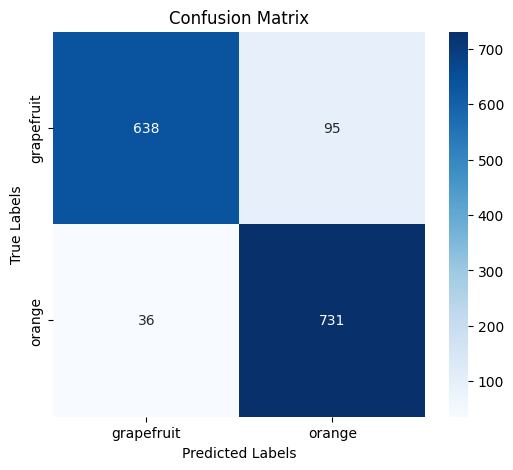

In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Menyimpan model, scaler, dan encoder menggunakan pickle

In [19]:
with open('perceptron_fruit.pkl', 'wb') as model_file:
    pickle.dump(perceptron, model_file)
with open('scaler_fruit_Perseptron.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
with open('label_encoder_fruit_Perseptron.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

print("Model, scaler, dan encoder berhasil disimpan.")

Model, scaler, dan encoder berhasil disimpan.


Memuat kembali model, scaler, dan encoder menggunakan pickle

In [20]:
with open('perceptron_fruit.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('scaler_fruit_Perseptron.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)
with open('label_encoder_fruit_Perseptron.pkl', 'rb') as encoder_file:
    encoder = pickle.load(encoder_file)

merubah encoder ke data semula dan mengetes dengan data baru

In [21]:
def test_new_data(new_data):
    # Validasi kolom
    required_columns = ['diameter', 'weight', 'red', 'green', 'blue']
    if not all(col in new_data.columns for col in required_columns):
        raise ValueError(f"Data baru harus memiliki kolom: {required_columns}")
    
    # Validasi tipe data dan nilai
    if not all(new_data[col].dtype in [np.float64, np.int64] for col in required_columns):
        raise ValueError("Semua kolom harus bertipe numerik (float atau int).")
    if new_data.isnull().any().any():
        raise ValueError("Data baru tidak boleh mengandung nilai NaN.")
    
    # Skala data baru
    new_data_scaled = scaler.transform(new_data)
    # Prediksi
    predictions = perceptron.predict(new_data_scaled)
    return encoder.inverse_transform(predictions)

Fungsi untuk menguji dffruit baru

In [22]:
# Contoh Data Baru
new_data = pd.DataFrame({
    'diameter': [5.5, 6.3],
    'weight': [120, 150],
    'red': [200, 180],
    'green': [50, 60],
    'blue': [30, 40]
})

print("Prediksi untuk data baru:")
try:
    predictions = test_new_data(new_data)
    print(predictions)
except ValueError as e:
    print(f"Error: {e}")

Prediksi untuk data baru:
['orange' 'orange']
